In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline
#All teams

In [2]:
matches=pd.read_csv('matches2018.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
plot_matches=matches
matches.head()
matches.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
matches.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [7]:
matches['winner'].fillna('Draw', inplace=True)

In [8]:
matches['city'].fillna('Dubai',inplace=True)
matches.describe()
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               756 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             756 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [15]:

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Capitals','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','CSK','RR','DC','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)
indexNames=matches[(matches['team1']=='KTK')|(matches['team2']=='KTK')].index
indexNames2=matches[(matches['team1']=='GL')|(matches['team2']=='GL')].index
indexNames3=matches[(matches['team1']=='RPS')|(matches['team2']=='RPS')].index
indexNames4=matches[(matches['team1']=='PW')|(matches['team2']=='PW')].index
matches.drop(indexNames , inplace=True)
matches.drop(indexNames2 , inplace=True)
matches.drop(indexNames3 , inplace=True)
matches.drop(indexNames4 , inplace=True)

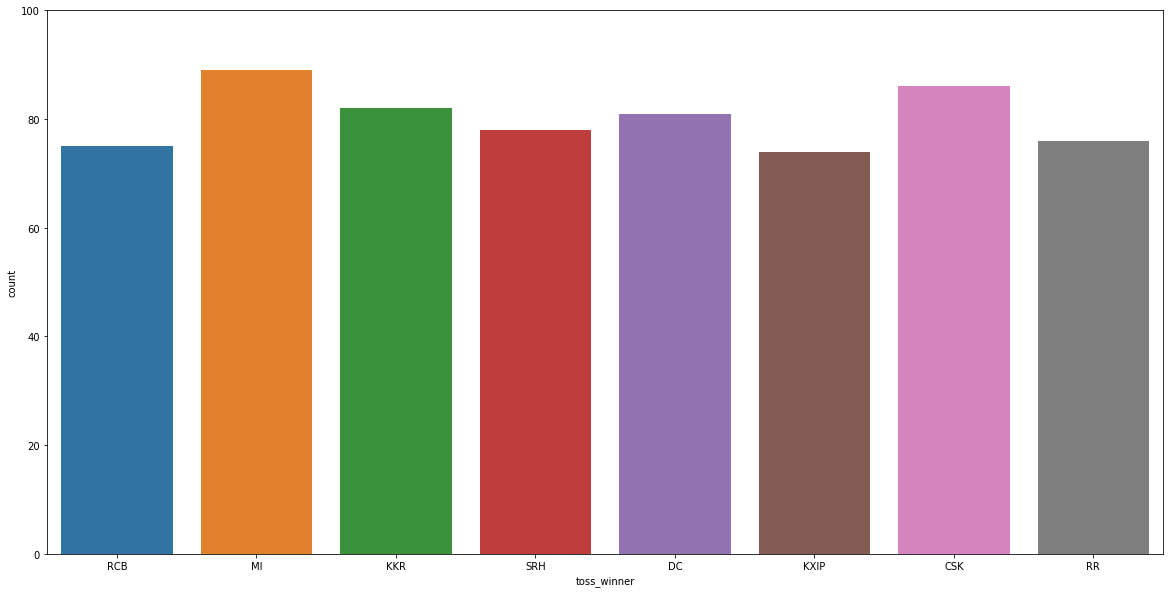

In [16]:
#SHOWS NO OF TOSSES WON BY EACH TEAM
plt.figure(figsize=(20,10))
plt.ylim(0, 100)
sns.countplot(x='toss_winner',data=matches)

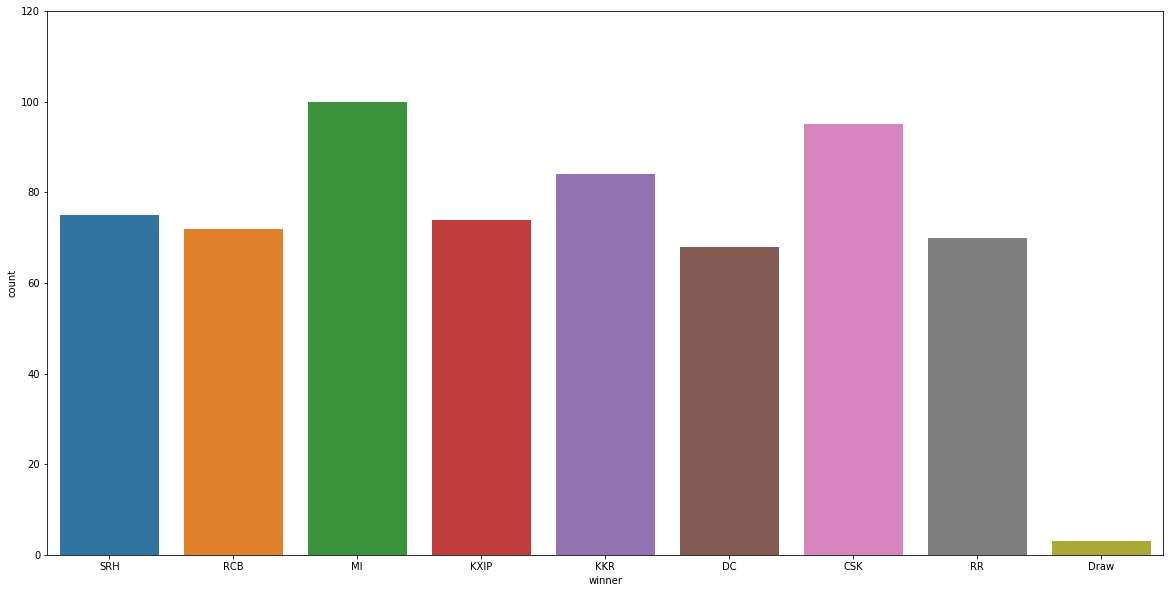

In [17]:
#SHOWS NO OF MATCHES WON BY EACH TEAM
plt.figure(figsize=(20,10))
plt.ylim(0, 120)
sns.countplot(x='winner',data=matches)

(0, 120)

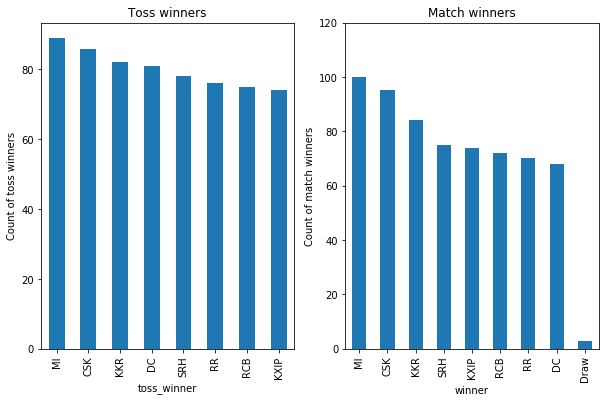

In [18]:
#TOSS WINNERS VS MATCH WINNERS
temp1=matches['toss_winner'].value_counts(sort=True)
temp2=matches['winner'].value_counts(sort=True)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("Toss winners")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")
plt.ylim(0, 120)

(0, 500)

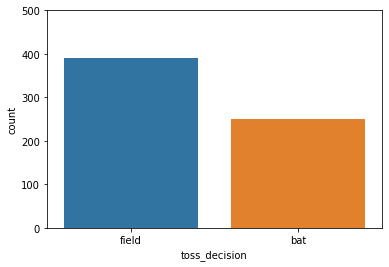

In [19]:
sns.countplot(x='toss_decision',data=matches)
plt.ylim(0,500)

In [20]:
cntwon=pd.DataFrame(matches['winner'].value_counts(sort=True))
cntwon


,winner
MI,100
CSK,95
KKR,84
SRH,75
KXIP,74
RCB,72
RR,70
DC,68
Draw,3


In [21]:
print(len(matches[matches['toss_decision']=='field']))
print(len(matches[matches['toss_decision']=='bat']))

390
251


In [22]:
matches.columns
matches['year']=matches['date'].apply(lambda date:date[0:4])
matches.head(3)
ipl_2017=matches[(matches['year']=='2019')|(matches['year']=='2018')|(matches['year']=='2017')|(matches['year']=='2016')|(matches['year']=='2015')|(matches['year']=='2014')|(matches['year']=='2013')|(matches['year']=='2012')|(matches['year']=='2011')|(matches['year']=='2010')|(matches['year']=='2009')|(matches['year']=='2008')]
ipl_2017.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017
4,5,2017,Bangalore,2017-04-08,RCB,DC,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017
6,7,2017,Mumbai,2017-04-09,KKR,MI,MI,field,normal,0,MI,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,2017


In [23]:
len(ipl_2017)
#matches['team1']

521

In [24]:
ipl_2017.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'year'],
      dtype='object')

In [25]:
#pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

In [26]:

encode = {'team1': {'MI':1,'CSK':2,'KKR':3,'RCB':4,'KXIP':5,'DD':6,'RR':7,'SRH':8,'DC':9,'RPS':10,'GL':11,'PW':12,'KTK':13},
          'team2': {'MI':1,'CSK':2,'KKR':3,'RCB':4,'KXIP':5,'DD':6,'RR':7,'SRH':8,'DC':9,'RPS':10,'GL':11,'PW':12,'KTK':13},
          'toss_winner': {'MI':1,'CSK':2,'KKR':3,'RCB':4,'KXIP':5,'DD':6,'RR':7,'SRH':8,'DC':9,'RPS':10,'GL':11,'PW':12,'KTK':13},
          'winner': {'MI':1,'CSK':2,'KKR':3,'RCB':4,'KXIP':5,'DD':6,'RR':7,'SRH':8,'DC':9,'RPS':10,'GL':11,'PW':12,'KTK':13,'Draw':14},
         'toss_decision':{'field':1,'bat':2}}
ipl_2017.replace(encode, inplace=True)
ipl_2017.head()
ttsipl=pd.DataFrame(ipl_2017)


C:\Users\niksr\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [27]:
ttsipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year
0,1,2017,Hyderabad,2017-04-05,8,4,4,1,normal,0,8,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017
4,5,2017,Bangalore,2017-04-08,4,9,4,2,normal,0,4,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017
6,7,2017,Mumbai,2017-04-09,3,1,1,1,normal,0,1,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,2017
7,8,2017,Indore,2017-04-10,4,5,4,2,normal,0,5,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017
9,10,2017,Mumbai,2017-04-12,8,1,1,1,normal,0,1,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,2017


In [28]:
ttsipl=ttsipl.drop(['date','result','dl_applied','win_by_runs','player_of_match','id','umpire1','venue','umpire2','umpire3','win_by_wickets','year','season'],axis=1)

In [29]:
ttsipl.columns

Index(['city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner'], dtype='object')

In [30]:
ttsipl.head()
#print(len(ttsipl))

,city,team1,team2,toss_winner,toss_decision,winner
0,Hyderabad,8,4,4,1,8
4,Bangalore,4,9,4,2,4
6,Mumbai,3,1,1,1,1
7,Indore,4,5,4,2,5
9,Mumbai,8,1,1,1,1


In [31]:
#ttsipl = pd.get_dummies(ttsipl, prefix=['Team_1', 'Team_2'], columns=['team1', 'team2'])

In [32]:
ttsipl.columns

Index(['city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner'], dtype='object')

In [33]:
ttsipl.head()

,city,team1,team2,toss_winner,toss_decision,winner
0,Hyderabad,8,4,4,1,8
4,Bangalore,4,9,4,2,4
6,Mumbai,3,1,1,1,1
7,Indore,4,5,4,2,5
9,Mumbai,8,1,1,1,1


# Decision Tree Algorithm

In [34]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
dtree = DecisionTreeClassifier()

In [53]:
X=ttsipl.drop(['city','winner'],axis=1)
y=ttsipl['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print('Accuracy is',metrics.accuracy_score(y_test,predictions))

Accuracy is 0.48091603053435117


In [54]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print('Accuracy of SVM Classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM Classifier on test set: 0.4275


C:\Users\niksr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Random Forest Algorithm

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
#RANDOM FOREST
X=ttsipl.drop(['city','winner'],axis=1)
y=ttsipl['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rf = RandomForestClassifier(n_estimators=300)
rf.fit(X_train,y_train)
predictions_rf = rf.predict(X_test)
print('Accuracy is',metrics.accuracy_score(y_test,predictions_rf))

Accuracy is 0.6183206106870229


In [46]:
X.head()

,team1,team2,toss_winner,toss_decision
0,8,4,4,1
4,4,9,4,2
6,3,1,1,1
7,4,5,4,2
9,8,1,1,1


In [39]:
y.head()

0    8
4    4
6    1
7    5
9    1
Name: winner, dtype: int64

In [40]:
print(X_train, X_test, y_train, y_test)

    team1 team2 toss_winner  toss_decision
518     2     9           9              1
84      2     8           8              1
308     3     9           9              1
485     5     2           2              1
528     8     7           7              1
..    ...   ...         ...            ...
99      9     5           9              2
134     5     1           5              2
330     8     9           8              2
522     9     7           7              1
130     2     8           8              1

[390 rows x 4 columns]     team1 team2 toss_winner  toss_decision
612     8     1           1              1
121     2     4           2              2
11      4     1           1              1
299     8     5           5              1
118     4     7           4              2
..    ...   ...         ...            ...
258     9     5           5              1
183     7     4           4              1
212     3     9           3              2
489     1     2           2   

In [41]:
predictions_rf = rf.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_rf})  
print(df_pred)
print('Accuracy is',metrics.accuracy_score(y_test,predictions_rf))

     Actual  Predicted
612       8          1
121       2          2
11        1          1
299       8          5
118       4          7
..      ...        ...
258       9          5
183       4          4
212       3          3
489       2          2
36        1          4

[131 rows x 2 columns]
Accuracy is 0.6030534351145038


In [42]:
hours=[[3,4,3,2]]
pred_h=rf.predict(hours)

In [43]:
print('Actual:',hours[0][0])
print('Predicted Winner:',pred_h[0])

Actual: 3
Predicted Winner: 3
